# **ResNet (DNN) Example for Fashion MNIST Dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Define improved DNN model
def create_improved_dnn():
    inputs = Input(shape=(784,))
    x = Dense(256)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(64, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)

    return Model(inputs, outputs)

In [9]:
# Define improved ResNet-style DNN model
def create_improved_resnet_dnn():
    inputs = Input(shape=(784,))

    # Initial dense layer
    x = Dense(256, activation='relu')(inputs)

    # Residual block 1
    x1 = Dense(256)(x)
    x1 = BatchNormalization()(x1)
    x1 = Activation('relu')(x1)
    x2 = Dense(256)(x1)
    x2 = BatchNormalization()(x2)
    x2 = Activation('relu')(x2)
    res1 = Add()([x, x2])
    res1 = Activation('relu')(res1)
    res1 = Dropout(0.3)(res1)

    # Residual block 2
    x3 = Dense(128)(res1)
    x3 = BatchNormalization()(x3)
    x3 = Activation('relu')(x3)
    x4 = Dense(128)(x3)
    x4 = BatchNormalization()(x4)
    x4 = Activation('relu')(x4)
    res1_down = Dense(128, activation='relu')(res1)  # to match dimensions
    res2 = Add()([res1_down, x4])
    res2 = Activation('relu')(res2)
    res2 = Dropout(0.3)(res2)

    # Final layers
    x_final = Dense(64, activation='relu')(res2)
    outputs = Dense(10, activation='softmax')(x_final)

    return Model(inputs, outputs)


In [11]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
callbacks = [early_stop, lr_schedule]

In [12]:
# Create models
dnn_model = create_improved_dnn()
resnet_model = create_improved_resnet_dnn()

In [13]:
# Loss with label smoothing
loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

# Compile models
dnn_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])


In [15]:

# Train models
dnn_history = dnn_model.fit(x_train_flat, y_train,
                            epochs=50,
                            batch_size=128,
                            validation_split=0.2,
                            callbacks=callbacks,
                            verbose=1)

resnet_history = resnet_model.fit(x_train_flat, y_train,
                                  epochs=50,
                                  batch_size=128,
                                  validation_split=0.2,
                                  callbacks=callbacks,
                                  verbose=1)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9394 - loss: 0.6405 - val_accuracy: 0.9032 - val_loss: 0.7183 - learning_rate: 6.2500e-05
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9390 - loss: 0.6405 - val_accuracy: 0.9024 - val_loss: 0.7177 - learning_rate: 6.2500e-05
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9408 - loss: 0.6386 - val_accuracy: 0.9036 - val_loss: 0.7172 - learning_rate: 6.2500e-05
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9417 - loss: 0.6354 - val_accuracy: 0.9029 - val_loss: 0.7193 - learning_rate: 6.2500e-05
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9411 - loss: 0.6363 - val_accuracy: 0.9039 - val_loss: 0.7171 - learning_rate: 6.2500e-05
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9404 - loss: 0.6367 - val_accuracy: 0.9034 - val_loss: 0.7177 - learning_rate: 6.2500e-05
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step -

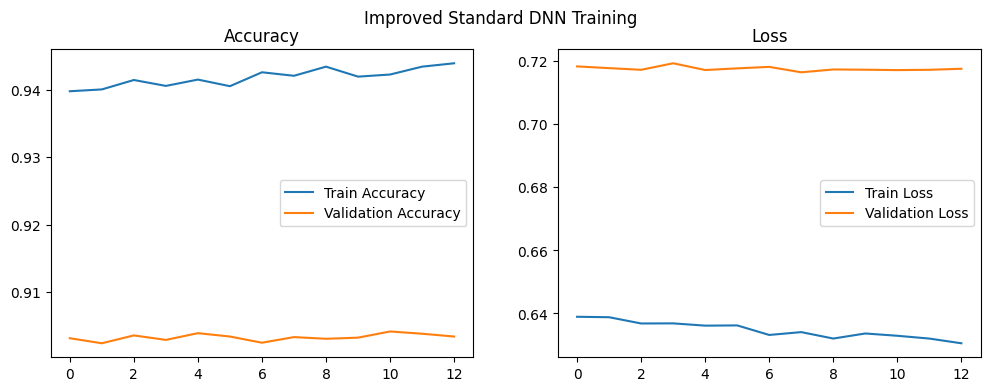

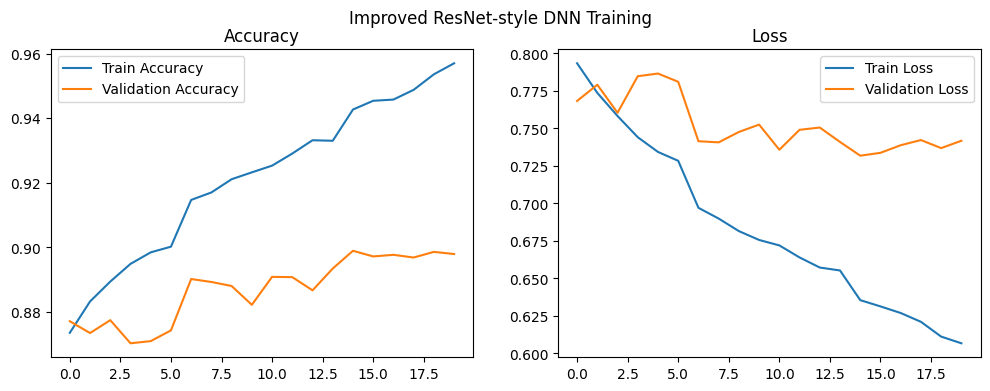

In [16]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_history(dnn_history, 'Improved Standard DNN Training')
plot_history(resnet_history, 'Improved ResNet-style DNN Training')


In [17]:
# Evaluate on test set
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

print(f"Improved Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"Improved ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Improved Standard DNN Test Accuracy: 0.8989
Improved ResNet-style DNN Test Accuracy: 0.8953



Improved Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


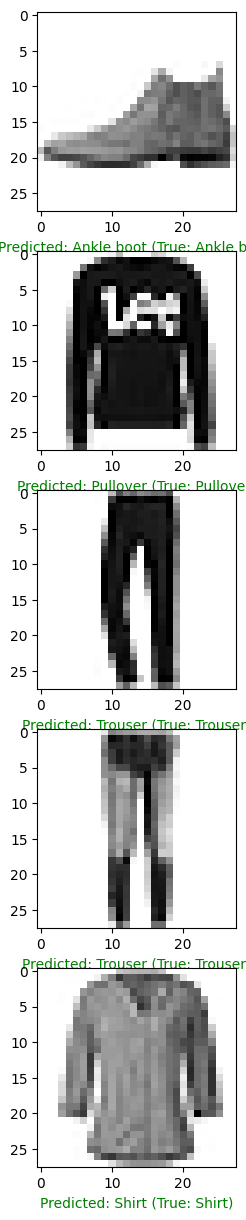


Improved ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


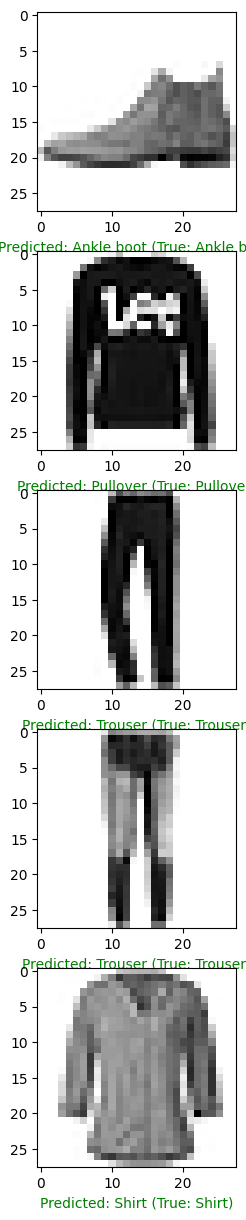

In [18]:
# Visualize predictions
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nImproved Standard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nImproved ResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)
